## Research Questions

### Economics questions

* How are the employees of the City of Chicago paid by job title relative to other areas with that job in the US?
  * We will need data at the level of the City of Chicago and at a national level, perhaps that supplied by the Bureau of Labor Statistics.
  

### Gender-related questions

If the dataset we start with doesn't have an indication of gender, how will we estimate it?

Could we infer gender from first name?

* How are men with the same job titles in the same departments paid relative to women in the City of Chicago?

* Do women do different jobs than men in the City?

* Are women or men in management roles proportional to the gender distribution of the department?
  * How do we define which roles are management roles?
  
Considerations: 

* How would time spent in the department, position, or career affect compensation?

### Compensation Questions

* Do people with common names get paid differently from people with uncommon names?
  
  
### Safety-related questions

* What are the safest jobs in the City?
  * How do we define 'safe'? Where can we get data?

  
## Informational Views

* Show employees by department.
  * Enrichment idea: Merge in a description of department data so that we have a better idea of where people work.
* Show employees by job title.
* Show the salary of an individual by first or last name.

In [1]:
import pandas as pd

In [6]:
data = pd.read_json('https://enigmatic-stream-34228.herokuapp.com/employees')

In [7]:
import seaborn as sns
sns.set()

In [9]:
data.describe()

,annualized_income,hourly_rate,typical_hours
count,33183.000000,33183.000000,33183.000000
mean,81069.414879,39.564248,38.672212
std,26023.868229,11.300300,5.120740
min,2756.000000,2.650000,10.000000
25%,72510.000000,34.860577,40.000000
50%,87006.000000,41.829808,40.000000
75%,95888.000000,46.100000,40.000000
max,300000.000000,144.230769,40.000000


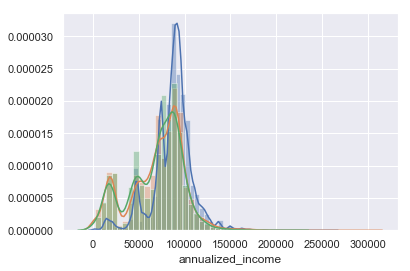

In [5]:
sns.distplot(data[data['gender'] == 'male'].annualized_income)
sns.distplot(data[data['gender'] == 'female'].annualized_income)
sns.distplot(data[data['gender'] == 'unknown'].annualized_income)

In [11]:
data.department.value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

In [19]:
data[data.hourly_rate < 3.0].job_titles.value_counts()

FOSTER GRANDPARENT    127
SENIOR COMPANION       79
Name: job_titles, dtype: int64

In [24]:
data[data.department == 'DoIT'].job_titles.value_counts()

PROJECT MANAGER - DOIT                    18
IT DIRECTOR (DoIT)                         9
PRINCIPAL DATA BASE ANALYST                7
PRINCIPAL PROGRAMMER/ANALYST               5
SENIOR HELP DESK TECHNICIAN                5
CHIEF PROGRAMMER/ANALYST                   4
SENIOR TELECOMMUNICATIONS SPECIALIST       4
DATA SERVICES ADMINISTRATOR                4
SENIOR DATA BASE ANALYST                   3
PR TELECOMMUNICATIONS SPECIALIST           3
CHIEF DATA BASE ANALYST                    2
SR DATA BASE ANALYST - PER AGRMT           2
PROGRAMMER/ANALYST PER AGRMNT              2
DIR OF INFORMATION SYSTEMS                 2
SR PROGRAMMER/ANALYST PER AGRMNT           2
CHIEF INFORMATION OFFICER                  1
PERSONAL COMPUTER OPERATOR II              1
COORD OF SPECIAL PROJECTS                  1
SUPVSR OF PERSONNEL SERVICES               1
IT SECURITY SPECIALIST                     1
TELECOMMUNICATIONS SPECIALIST              1
SENIOR INFORMATION ANALYST                 1
INFORMATIO

In [25]:
doit = data[data.department == 'DoIT']

In [32]:
doit.groupby('job_titles', as_index=False).mean().sort_values(by='annualized_income', ascending=False)

,job_titles,annualized_income,hourly_rate,typical_hours
4,CHIEF INFORMATION OFFICER,154992.000000,74.515385,40
40,TELEPHONE SYSTEMS ADMINISTRATOR,134172.000000,64.505769,40
13,FIRST DEPUTY CHIEF INFORMATION OFFICER,130872.000000,62.919231,40
5,CHIEF PROGRAMMER/ANALYST,124029.000000,59.629327,40
17,INFORMATION SECURITY MANAGER,120444.000000,57.905769,40
20,MANAGER OF TELECOMMUNICATIONS,118020.000000,56.740385,40
18,IT DIRECTOR (DoIT),116666.666667,56.089744,40
3,CHIEF DATA BASE ANALYST,115932.000000,55.736538,40
6,CHIEF PROGRAMMER/ANALYST EXCLUDED,115932.000000,55.736538,40
22,PR TELECOMMUNICATIONS SPECIALIST,112784.000000,54.223077,40


In [35]:
data[data.first_name == 'RAHM']

,annualized_income,department,first_name,full_or_part_time,gender,hourly_rate,job_titles,last_name,middle_name,name,salary_or_hourly,typical_hours
8195,216210.0,MAYOR'S OFFICE,RAHM,F,unknown,103.947115,MAYOR,EMANUEL,,"EMANUEL, RAHM",Salary,40


In [39]:
data[data.department == "MAYOR'S OFFICE"].sort_values(by='annualized_income', ascending=False)

,annualized_income,department,first_name,full_or_part_time,gender,hourly_rate,job_titles,last_name,middle_name,name,salary_or_hourly,typical_hours
8195,216210.0,MAYOR'S OFFICE,RAHM,F,unknown,103.947115,MAYOR,EMANUEL,,"EMANUEL, RAHM",Salary,40
6739,195000.0,MAYOR'S OFFICE,AARON,F,male,93.750000,CHIEF OF STAFF,DEAL,J,"DEAL, AARON J",Salary,40
24939,185004.0,MAYOR'S OFFICE,ROBERT,F,male,88.944231,ADMINISTRATIVE SECRETARY,RIVKIN,S,"RIVKIN, ROBERT S",Salary,40
5607,180000.0,MAYOR'S OFFICE,JOAN,F,female,86.538462,FIRST DEPUTY CHIEF OF STAFF,COOGAN,E,"COOGAN, JOAN E",Salary,40
31380,170004.0,MAYOR'S OFFICE,VICTORIA,F,female,81.732692,DEPUTY CHIEF OF STAFF,WATKINS,R,"WATKINS, VICTORIA R",Salary,40
3089,169992.0,MAYOR'S OFFICE,CAROLE,F,female,81.726923,CHIEF FINANCIAL OFFICER,BROWN,L,"BROWN, CAROLE L",Salary,40
11336,169002.0,MAYOR'S OFFICE,MARIA,F,female,81.250962,DIR OF INTERGOVERNMENTAL AFFAIRS,GUERRA,,"GUERRA, MARIA",Salary,40
21035,165564.0,MAYOR'S OFFICE,MICHAEL,F,male,79.598077,ASST TO THE MAYOR,NEGRON,A,"NEGRON, MICHAEL A",Salary,40
14986,165000.0,MAYOR'S OFFICE,WALTER,F,male,79.326923,ADMINISTRATIVE ASST,KATZ,W,"KATZ, WALTER W",Salary,40
5381,160002.0,MAYOR'S OFFICE,ADAM,F,male,76.924038,PRESS SECRETARY,COLLINS,,"COLLINS, ADAM",Salary,40


In [42]:
data.groupby('department', as_index=False).sum().sort_values(by='annualized_income', ascending=False)

,department,annualized_income,hourly_rate,typical_hours
27,POLICE,1.159361e+09,557432.253462,536360
17,FIRE,4.545972e+08,218556.337096,185640
34,WATER MGMNT,1.656208e+08,79625.405962,75160
31,STREETS & SAN,1.504003e+08,76213.041923,82590
2,AVIATION,1.227951e+08,59265.770038,64725
32,TRANSPORTN,9.945361e+07,47814.237115,45600
26,OEMC,8.925408e+07,54298.057308,59500
18,GENERAL SERVICES,8.443537e+07,40593.926962,39200
30,PUBLIC LIBRARY,5.623235e+07,29321.537308,34840
19,HEALTH,4.194285e+07,20195.565769,19505


In [43]:
data.annualized_income.sum()

2690126393.92